In [25]:
#import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1' # Uncomment if you don't want to use GPU.

import sys
sys.path.append('utilities')
sys.path.append('IPA_model')
#from GraphBuilder import GraphBuilder
from IPA import load_model

import numpy as np
import tensorflow as tf

In [48]:
model_path_d = 'weights/IPA_d'
model_path_cd = 'weights/IPA_cd'
model = load_model(save_path=model_path_cd)

In [49]:
# Test data for S66x8
import numpy as np
data = np.load('test_data/S66x8.npy', allow_pickle=True).item()
predictions, references = [], []
for key in data:
    graph_1, graph_2, coords_1, coords_2, multipoles, dmats, smile_1, smile_2, elements_1, elements_2, ref_energies = data[key]
    # or if graph is not given
    # graph_1 = builder.topological_from_coords(coords_1[0], elements_1)
    # graph_2 = builder.topological_from_coords(coords_2[0], elements_2)
    dex_term, ex_term, dis_term = model(graph_1, graph_2, dmats)
    monos_1, monos_2 = multipoles[0], multipoles[1] # Only monopoles are used here
    coulomb_terms = (monos_1 * np.transpose(monos_2, [0, 2, 1])) / dmats
    coulomb_terms = 1389.35457644382 * tf.reduce_sum(coulomb_terms, axis=[-1, -2])
    total = dex_term + coulomb_terms
    references.append(ref_energies)
    predictions.append(total)
predictions, references = np.array(predictions), np.array(references)

2.927357415511962

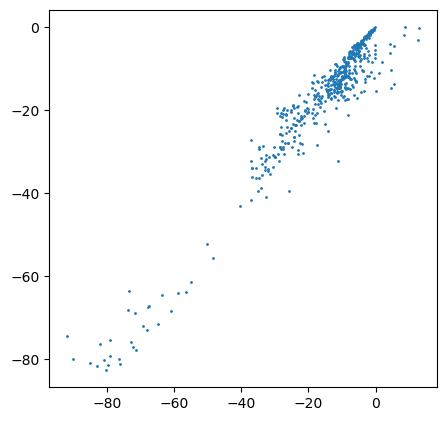

In [50]:
import matplotlib.pyplot as plt
plt.figure(0, figsize=(5, 5), dpi=100)
plt.scatter(predictions, references, s=1)
np.mean(np.abs(predictions - references)) # If everything works out, the MAE should be ~ 2.92 for model_path_cd